# Test to print 3D-function for sphere:

<IPython.core.display.Javascript object>


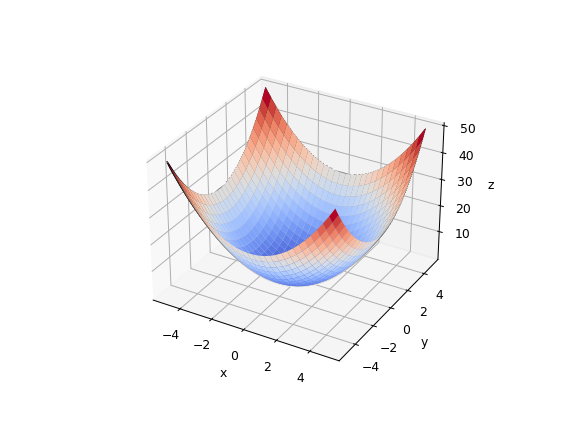

<IPython.core.display.Javascript object>


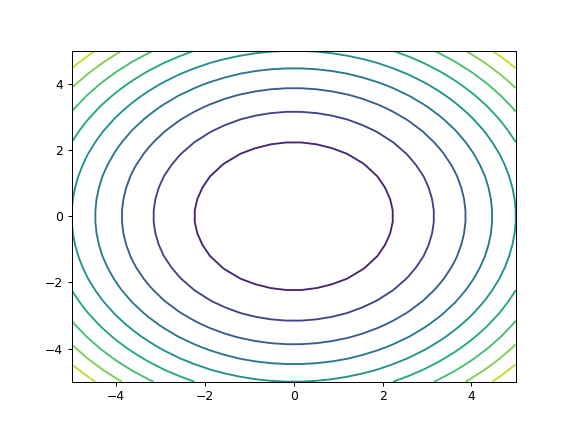

In [4]:
%matplotlib notebook
from cost_function import sphere_grid
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-5, 5, 30)
y = np.linspace(-5, 5, 30)

X, Y = np.meshgrid(x, y)

a = X.reshape(X.shape[0]*X.shape[1], 1)
b = Y.reshape(Y.shape[0]*Y.shape[1], 1)
values = np.concatenate((a, b), axis=1)
Z = (sphere_grid(values)).reshape((len(Y), len(X)))

# 3D-graph
fig = plt.figure('sphere')
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 100, cmap='binary')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='coolwarm')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

# contour
fig = plt.figure('curve-set')
plt.contour(X, Y, Z, levels=10)

# Test to print 3D-function for ackley:

<IPython.core.display.Javascript object>


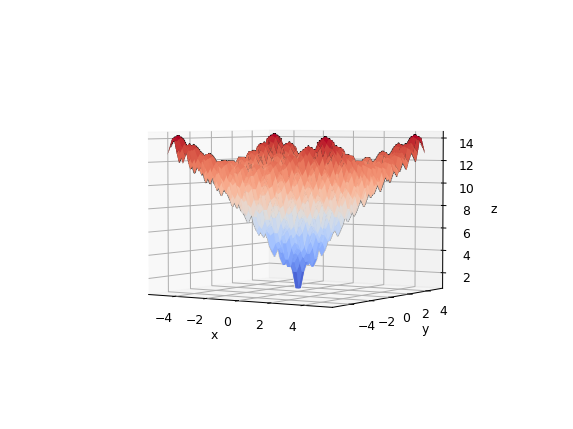

<IPython.core.display.Javascript object>


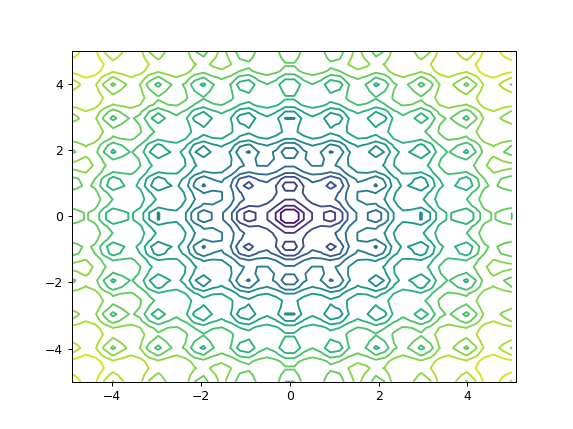

In [9]:
%matplotlib notebook
import numpy as np
from cost_function import ackley_grid
import matplotlib.pyplot as plt

x = np.linspace(-5, 5, 50)
y = np.linspace(-5, 5, 50)

X, Y = np.meshgrid(x, y)

a = X.reshape(X.shape[0]*X.shape[1], 1)
b = Y.reshape(Y.shape[0]*Y.shape[1], 1)
values = np.concatenate((a, b), axis=1)
Z = ackley_grid(values).reshape((len(Y), len(X)))

# 3-D graph
fig = plt.figure('ackley')
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 100, cmap='binary')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='coolwarm')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

# contour
fig = plt.figure('curve-set')
plt.contour(X, Y, Z, levels=20)